<a href="https://colab.research.google.com/github/angelaaaateng/ftw_python/blob/main/Multiple_Linear_Reg.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Multiple Linear Regression in Statsmodels

## Introduction

In this lecture, you'll learn how to run your first multiple linear regression model.

## Objectives
You will be able to:
* Use statsmodels to fit a multiple linear regression model
* For next time: Evaluate a linear regression model by using statistical performance metrics pertaining to overall model and specific parameters

## Statsmodels for multiple linear regression

**What is `statsmodels`?**

statsmodels is a Python module that provides classes and functions for the estimation of many different statistical models, as well as for conducting statistical tests, and statistical data exploration. An extensive list of result statistics are available for each estimator. The results are tested against existing statistical packages to ensure that they are correct. The package is released under the open source Modified BSD (3-clause) license. The online documentation is hosted at statsmodels.org.


This lesson will be more of a code-along, where you'll walk through a multiple linear regression model using both statsmodels and scikit-learn. 

The regression model determines a line of best fit by minimizing the sum of squares of the errors between the models predictions and the actual data. In intro algebra and statistics classes, this is often limited to the simple 2 variable case of $y=mx+b$, but this process can be generalized to use multiple predictive variables.



In [103]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

import statsmodels.api as sm
import statsmodels.formula.api as smf

In [26]:
# There are genrally two ways to specify formulas using stats models: 
# 1) R Style Formulas 
# 2) Pandas Dataframes 

#### OLS Via R-Style Formulas:

# Load data from statsmodel 
dat = sm.datasets.get_rdataset("Guerry", "HistData").data

In [27]:
dat

,dept,Region,Department,Crime_pers,Crime_prop,Literacy,Donations,Infants,Suicides,MainCity,...,Crime_parents,Infanticide,Donation_clergy,Lottery,Desertion,Instruction,Prostitutes,Distance,Area,Pop1831
0,1,E,Ain,28870,15890,37,5098,33120,35039,2:Med,...,71,60,69,41,55,46,13,218.372,5762,346.03
1,2,N,Aisne,26226,5521,51,8901,14572,12831,2:Med,...,4,82,36,38,82,24,327,65.945,7369,513.00
2,3,C,Allier,26747,7925,13,10973,17044,114121,2:Med,...,46,42,76,66,16,85,34,161.927,7340,298.26
3,4,E,Basses-Alpes,12935,7289,46,2733,23018,14238,1:Sm,...,70,12,37,80,32,29,2,351.399,6925,155.90
4,5,E,Hautes-Alpes,17488,8174,69,6962,23076,16171,1:Sm,...,22,23,64,79,35,7,1,320.280,5549,129.10
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
81,86,W,Vienne,15010,4710,25,8922,35224,21851,2:Med,...,20,1,44,40,38,65,18,170.523,6990,282.73
82,87,C,Haute-Vienne,16256,6402,13,13817,19940,33497,2:Med,...,68,6,78,55,11,84,7,198.874,5520,285.13
83,88,E,Vosges,18835,9044,62,4040,14978,33029,2:Med,...,58,34,5,14,85,11,43,174.477,5874,397.99
84,89,C,Yonne,18006,6516,47,4276,16616,12789,2:Med,...,32,22,35,51,66,27,272,81.797,7427,352.49


In [28]:
# Fit regression model (using the natural log of one of the regressors)
results = smf.ols('Lottery ~ Literacy + np.log(Pop1831)', data=dat).fit()

In [29]:
# Inspect the results
print(results.summary())

                            OLS Regression Results                            
Dep. Variable:                Lottery   R-squared:                       0.348
Model:                            OLS   Adj. R-squared:                  0.333
Method:                 Least Squares   F-statistic:                     22.20
Date:                Sat, 14 Jan 2023   Prob (F-statistic):           1.90e-08
Time:                        09:39:08   Log-Likelihood:                -379.82
No. Observations:                  86   AIC:                             765.6
Df Residuals:                      83   BIC:                             773.0
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
                      coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------
Intercept         246.4341     35.233     

In [30]:
### Numpy Method 

#nobs = number of observations 

# Generate artificial data (2 regressors + constant)
nobs = 100
# create random values in a given shape
X = np.random.random((nobs, 2))

# Add a column of ones to an array.
X = sm.add_constant(X)

# add B values
beta = [1, .1, .5]

e = np.random.random(nobs)

In [31]:
# formula 
# take the dot product of two arrays
y = np.dot(X, beta) + e

In [32]:
print(len(y))

y

100


array([1.48969122, 1.21200098, 1.13834762, 1.73794593, 2.04197686,
       1.66377216, 1.68527891, 1.99364749, 1.25347566, 1.39751458,
       2.28809035, 1.44077109, 1.36740505, 2.00406291, 1.58063723,
       2.1503649 , 2.11696678, 1.87645836, 1.79843913, 1.36492871,
       2.13425152, 1.86218622, 1.44733449, 2.39427922, 1.9717309 ,
       1.80079056, 2.09258315, 1.62432364, 2.31553718, 1.71488247,
       2.24018513, 1.92305543, 2.35938277, 2.27773851, 2.23288468,
       1.90619608, 1.39260182, 1.59519628, 2.3163685 , 1.25890354,
       2.12609801, 1.24552817, 1.87823382, 2.0598614 , 1.85405604,
       1.7344042 , 1.61316855, 1.64657275, 1.78282591, 1.58262014,
       1.60364252, 1.56224889, 1.70657316, 1.96286285, 2.33497949,
       1.41927313, 2.54915495, 1.92878565, 1.48887966, 1.5700171 ,
       2.03179686, 1.2582763 , 2.17936601, 1.9386421 , 1.41610943,
       2.42625506, 2.01419308, 1.70796017, 1.78918888, 1.20662529,
       2.06503999, 2.06843602, 1.99498712, 1.33968863, 1.92792

In [33]:
# Fit regression model
results = sm.OLS(y, X).fit()

In [34]:
# Inspect the results
print(results.summary())

                            OLS Regression Results                            
Dep. Variable:                      y   R-squared:                       0.238
Model:                            OLS   Adj. R-squared:                  0.222
Method:                 Least Squares   F-statistic:                     15.13
Date:                Sat, 14 Jan 2023   Prob (F-statistic):           1.91e-06
Time:                        09:39:08   Log-Likelihood:                -24.483
No. Observations:                 100   AIC:                             54.97
Df Residuals:                      97   BIC:                             62.78
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          1.4658      0.088     16.740      0.0

## Auto-mpg data

The Auto MPG sample data set is a collection of automobile records from 1970 to 1982. It contains attributes like car name, MPG, number of cylinders, horsepower and weight. 

* Creating dummy variables for each categorical feature
* Log-transforming select continuous predictors

To learn more about the dataset, we can read about it here https://archive.ics.uci.edu/ml/datasets/auto+mpg

The data is technical spec of cars. The dataset is downloaded from UCI Machine Learning Repository

In [35]:
data = pd.read_csv('https://raw.githubusercontent.com/angelaaaateng/ftw_python/main/data/auto-mpg.csv') 
data.head()

,mpg,cylinders,displacement,horsepower,weight,acceleration,model year,origin,car name
0,18.0,8,307.0,130,3504,12.0,70,1,chevrolet chevelle malibu
1,15.0,8,350.0,165,3693,11.5,70,1,buick skylark 320
2,18.0,8,318.0,150,3436,11.0,70,1,plymouth satellite
3,16.0,8,304.0,150,3433,12.0,70,1,amc rebel sst
4,17.0,8,302.0,140,3449,10.5,70,1,ford torino


In [36]:
data.isnull().any()

mpg             False
cylinders       False
displacement    False
horsepower      False
weight          False
acceleration    False
model year      False
origin          False
car name        False
dtype: bool

In [37]:
data.origin.value_counts()
# class in the r dataset 
# where did the car come from (ie origin country)

1    249
3     79
2     70
Name: origin, dtype: int64

In [38]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 398 entries, 0 to 397
Data columns (total 9 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   mpg           398 non-null    float64
 1   cylinders     398 non-null    int64  
 2   displacement  398 non-null    float64
 3   horsepower    398 non-null    object 
 4   weight        398 non-null    int64  
 5   acceleration  398 non-null    float64
 6   model year    398 non-null    int64  
 7   origin        398 non-null    int64  
 8   car name      398 non-null    object 
dtypes: float64(3), int64(4), object(2)
memory usage: 28.1+ KB


In [39]:
data.describe()

,mpg,cylinders,displacement,weight,acceleration,model year,origin
count,398.000000,398.000000,398.000000,398.000000,398.000000,398.000000,398.000000
mean,23.514573,5.454774,193.425879,2970.424623,15.568090,76.010050,1.572864
std,7.815984,1.701004,104.269838,846.841774,2.757689,3.697627,0.802055
min,9.000000,3.000000,68.000000,1613.000000,8.000000,70.000000,1.000000
25%,17.500000,4.000000,104.250000,2223.750000,13.825000,73.000000,1.000000
50%,23.000000,4.000000,148.500000,2803.500000,15.500000,76.000000,1.000000
75%,29.000000,8.000000,262.000000,3608.000000,17.175000,79.000000,2.000000
max,46.600000,8.000000,455.000000,5140.000000,24.800000,82.000000,3.000000


In [40]:
data.horsepower.unique()

array(['130', '165', '150', '140', '198', '220', '215', '225', '190',
       '170', '160', '95', '97', '85', '88', '46', '87', '90', '113',
       '200', '210', '193', '?', '100', '105', '175', '153', '180', '110',
       '72', '86', '70', '76', '65', '69', '60', '80', '54', '208', '155',
       '112', '92', '145', '137', '158', '167', '94', '107', '230', '49',
       '75', '91', '122', '67', '83', '78', '52', '61', '93', '148',
       '129', '96', '71', '98', '115', '53', '81', '79', '120', '152',
       '102', '108', '68', '58', '149', '89', '63', '48', '66', '139',
       '103', '125', '133', '138', '135', '142', '77', '62', '132', '84',
       '64', '74', '116', '82'], dtype=object)

In [44]:
data = data[data.horsepower != '?']
print('?' in data.horsepower)

False


In [45]:
data.shape

(392, 9)

In [46]:
data.dtypes

mpg             float64
cylinders         int64
displacement    float64
horsepower       object
weight            int64
acceleration    float64
model year        int64
origin            int64
car name         object
dtype: object

In [47]:
# convert float to int 
data.horsepower = data.horsepower.astype('float')

In [68]:
data['Country_code'] = data.origin.replace([1,2,3],['USA','Europe','Japan'])
data

,mpg,cylinders,displacement,horsepower,weight,acceleration,model year,origin,car name,Country_code
0,18.0,8,307.0,130.0,3504,12.0,70,1,chevrolet chevelle malibu,USA
1,15.0,8,350.0,165.0,3693,11.5,70,1,buick skylark 320,USA
2,18.0,8,318.0,150.0,3436,11.0,70,1,plymouth satellite,USA
3,16.0,8,304.0,150.0,3433,12.0,70,1,amc rebel sst,USA
4,17.0,8,302.0,140.0,3449,10.5,70,1,ford torino,USA
...,...,...,...,...,...,...,...,...,...,...
393,27.0,4,140.0,86.0,2790,15.6,82,1,ford mustang gl,USA
394,44.0,4,97.0,52.0,2130,24.6,82,2,vw pickup,Europe
395,32.0,4,135.0,84.0,2295,11.6,82,1,dodge rampage,USA
396,28.0,4,120.0,79.0,2625,18.6,82,1,ford ranger,USA


In [69]:
data.describe()

,mpg,cylinders,displacement,horsepower,weight,acceleration,model year,origin
count,392.000000,392.000000,392.000000,392.000000,392.000000,392.000000,392.000000,392.000000
mean,23.445918,5.471939,194.411990,104.469388,2977.584184,15.541327,75.979592,1.576531
std,7.805007,1.705783,104.644004,38.491160,849.402560,2.758864,3.683737,0.805518
min,9.000000,3.000000,68.000000,46.000000,1613.000000,8.000000,70.000000,1.000000
25%,17.000000,4.000000,105.000000,75.000000,2225.250000,13.775000,73.000000,1.000000
50%,22.750000,4.000000,151.000000,93.500000,2803.500000,15.500000,76.000000,1.000000
75%,29.000000,8.000000,275.750000,126.000000,3614.750000,17.025000,79.000000,2.000000
max,46.600000,8.000000,455.000000,230.000000,5140.000000,24.800000,82.000000,3.000000


In [70]:
data.mpg.describe()

count    392.000000
mean      23.445918
std        7.805007
min        9.000000
25%       17.000000
50%       22.750000
75%       29.000000
max       46.600000
Name: mpg, dtype: float64

/opt/anaconda3/envs/ftw/lib/python3.9/site-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='mpg', ylabel='Density'>

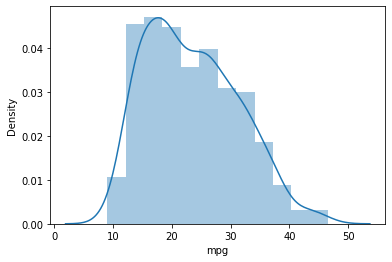

In [71]:
sns.distplot(data['mpg'])

In [72]:
print("Skewness: %f" % data['mpg'].skew())
print("Kurtosis: %f" % data['mpg'].kurt())

Skewness: 0.457092
Kurtosis: -0.515993


## Basic Data Visualization

- Visualize to see the relationship of variables which may help us selecting variables to create a model

In [100]:
def scale(a):
    b = (a-a.min())/(a.max()-a.min())
    return b

data_scale = data.copy()

data_scale ['displacement'] = scale(data_scale['displacement'])
data_scale['horsepower'] = scale(data_scale['horsepower'])
data_scale ['acceleration'] = scale(data_scale['acceleration'])
data_scale ['weight'] = scale(data_scale['weight'])
data_scale['mpg'] = scale(data_scale['mpg'])

In [101]:
data_scale.head()

,mpg,cylinders,displacement,horsepower,weight,acceleration,model year,origin,car name,Country_code
0,0.239362,8,0.617571,0.456522,0.536150,0.238095,70,1,chevrolet chevelle malibu,USA
1,0.159574,8,0.728682,0.646739,0.589736,0.208333,70,1,buick skylark 320,USA
2,0.239362,8,0.645995,0.565217,0.516870,0.178571,70,1,plymouth satellite,USA
3,0.186170,8,0.609819,0.565217,0.516019,0.238095,70,1,amc rebel sst,USA
4,0.212766,8,0.604651,0.510870,0.520556,0.148810,70,1,ford torino,USA


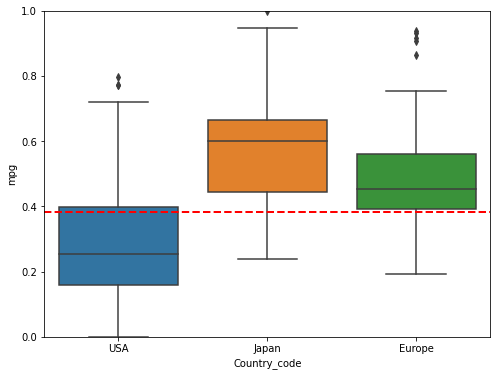

In [104]:
# What is MPG's relation to other categories? 

var = 'Country_code'
data_plt = pd.concat([data_scale['mpg'], data_scale[var]], axis=1)
f, ax = plt.subplots(figsize=(8, 6))
fig = sns.boxplot(x=var, y="mpg", data=data_plt)
fig.axis(ymin=0, ymax=1)
plt.axhline(data_scale.mpg.mean(),color='r',linestyle='dashed',linewidth=2)

The red line marks the average of the set. From the above plot we can observe:

- Majority of the cars from USA (almost 75%) have MPG below global average.
- Majority of the cars from Japan and Europe have MPG above global average.

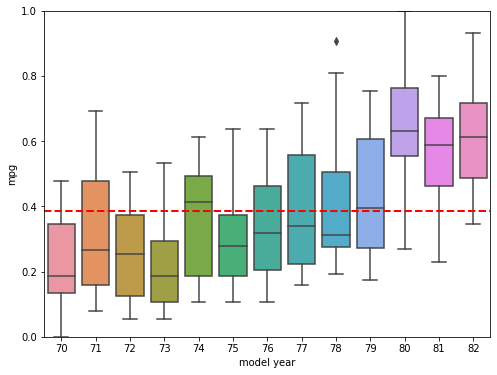

In [105]:
# MPG year over year 

var = 'model year'
data_plt = pd.concat([data_scale['mpg'], data_scale[var]], axis=1)
f, ax = plt.subplots(figsize=(8, 6))
fig = sns.boxplot(x=var, y="mpg", data=data_plt)
fig.axis(ymin=0, ymax=1)
plt.axhline(data_scale.mpg.mean(),color='r',linestyle='dashed',linewidth=2)

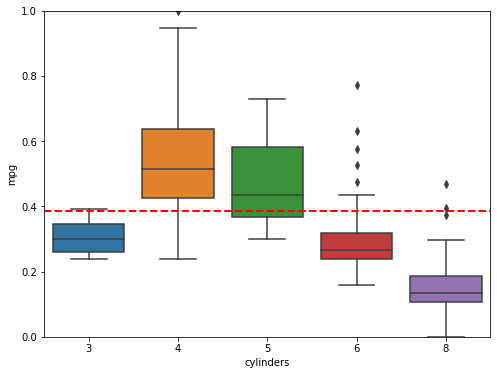

In [106]:
# MPG distribution for cylinders 

var = 'cylinders'
data_plt = pd.concat([data_scale['mpg'], data_scale[var]], axis=1)
f, ax = plt.subplots(figsize=(8, 6))
fig = sns.boxplot(x=var, y="mpg", data=data_plt)
fig.axis(ymin=0, ymax=1)
plt.axhline(data_scale.mpg.mean(),color='r',linestyle='dashed',linewidth=2)

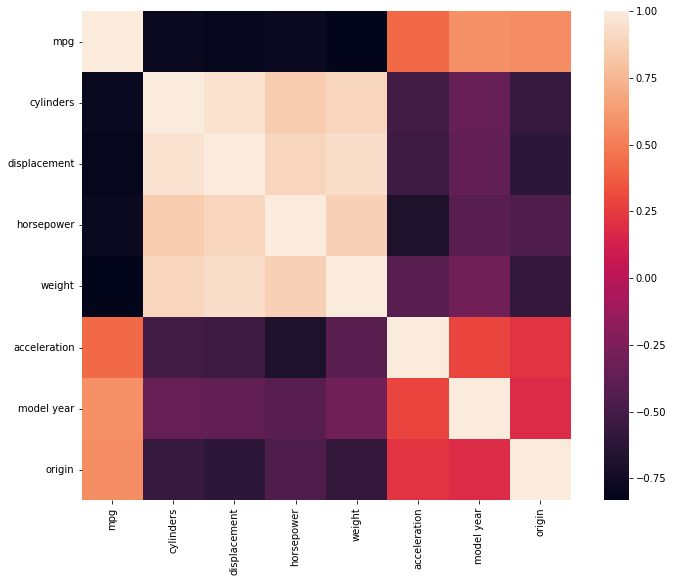

In [107]:
## What features are potentially corelated with MPG? 

corrmat = data.corr()
f, ax = plt.subplots(figsize=(12, 9))
sns.heatmap(corrmat, square=True);

# do all these factors make sense to get a correlation of? 

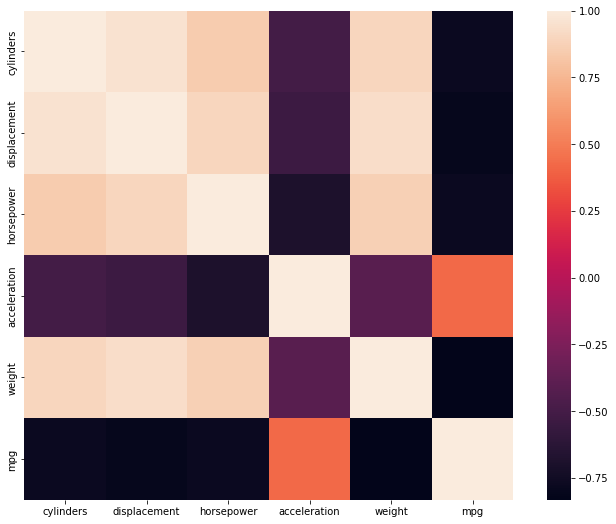

In [108]:
factors = ['cylinders','displacement','horsepower','acceleration','weight','mpg']
corrmat = data[factors].corr()
f, ax = plt.subplots(figsize=(12, 9))
sns.heatmap(corrmat, square=True);

# remove "model year" and "origin" 

/opt/anaconda3/envs/ftw/lib/python3.9/site-packages/seaborn/axisgrid.py:2076: UserWarning: The `size` parameter has been renamed to `height`; please update your code.
  warnings.warn(msg, UserWarning)


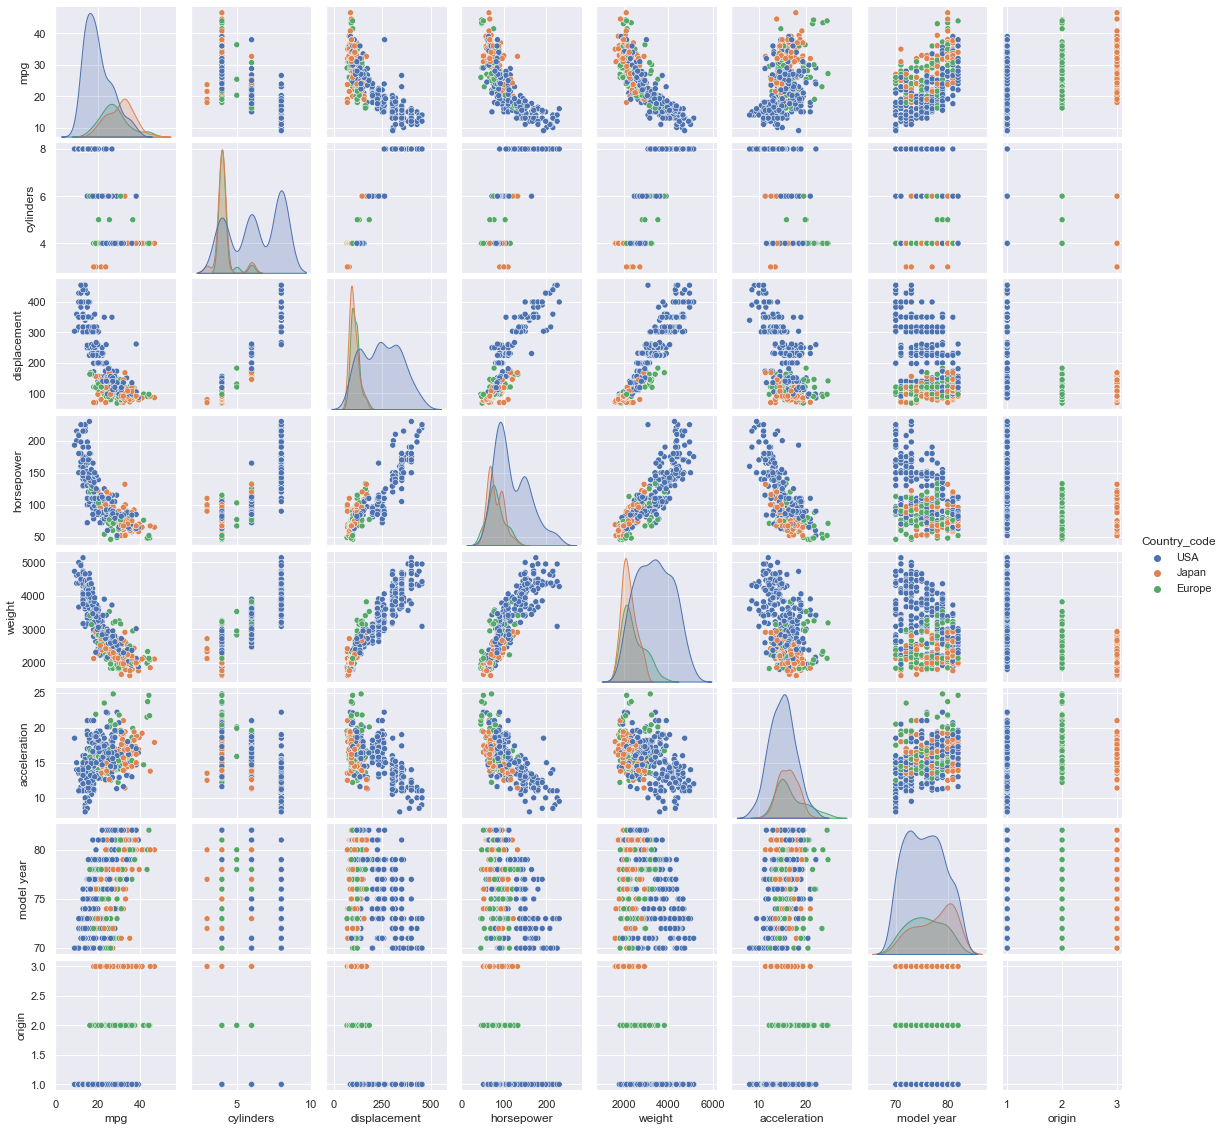

In [109]:
# how else can we view statistics? 

#scatterplot
sns.set()
sns.pairplot(data, size = 2.0,hue ='Country_code')
plt.show()

# Plot pairwise relationships in a dataset.

By default, this function will create a grid of Axes such that each numeric variable in data will by shared across the y-axes across a single row and the x-axes across a single column. The diagonal plots are treated differently: a univariate distribution plot is drawn to show the marginal distribution of the data in each column.


In [110]:
# create additional features + feature engineering
# getting started for linear regression

acc = data['acceleration']
logdisp = np.log(data['displacement'])
loghorse = np.log(data['horsepower'])
logweight= np.log(data['weight'])


# scale to range of [0,1]
scaled_acc = (acc-min(acc))/(max(acc)-min(acc))	
scaled_disp = (logdisp-np.mean(logdisp))/np.sqrt(np.var(logdisp))
scaled_horse = (loghorse-np.mean(loghorse))/(max(loghorse)-min(loghorse))
scaled_weight= (logweight-np.mean(logweight))/np.sqrt(np.var(logweight))


In [111]:
data_fin = pd.DataFrame([])
data_fin

""


In [112]:
data_fin['acc'] = scaled_acc
data_fin['disp'] = scaled_disp
data_fin['horse'] = scaled_horse
data_fin['weight'] = scaled_weight


In [113]:
data_fin.head()

,acc,disp,horse,weight
0,0.238095,1.125829,0.173727,0.720986
1,0.208333,1.372223,0.321860,0.908047
2,0.178571,1.191999,0.262641,0.651205
3,0.238095,1.107370,0.262641,0.648095
4,0.148810,1.094964,0.219773,0.664652


In [123]:
cyl_dummies = pd.get_dummies(data['cylinders'], prefix='cyl', drop_first=False)
yr_dummies = pd.get_dummies(data['model year'], prefix='yr', drop_first=False)
orig_dummies = pd.get_dummies(data['origin'], prefix='orig', drop_first=False)


In [124]:
cyl_dummies

,cyl_3,cyl_4,cyl_5,cyl_6,cyl_8
0,0,0,0,0,1
1,0,0,0,0,1
2,0,0,0,0,1
3,0,0,0,0,1
4,0,0,0,0,1
...,...,...,...,...,...
393,0,1,0,0,0
394,0,1,0,0,0
395,0,1,0,0,0
396,0,1,0,0,0


In [125]:
orig_dummies

,orig_1,orig_2,orig_3
0,1,0,0
1,1,0,0
2,1,0,0
3,1,0,0
4,1,0,0
...,...,...,...
393,1,0,0
394,0,1,0
395,1,0,0
396,1,0,0


In [126]:
mpg = data['mpg']
data_fin = pd.concat([mpg, data_fin, cyl_dummies, yr_dummies, orig_dummies], axis=1)

In [127]:
data_fin.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 392 entries, 0 to 397
Data columns (total 45 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   mpg     392 non-null    float64
 1   mpg     392 non-null    float64
 2   acc     392 non-null    float64
 3   disp    392 non-null    float64
 4   horse   392 non-null    float64
 5   weight  392 non-null    float64
 6   cyl_4   392 non-null    uint8  
 7   cyl_5   392 non-null    uint8  
 8   cyl_6   392 non-null    uint8  
 9   cyl_8   392 non-null    uint8  
 10  yr_71   392 non-null    uint8  
 11  yr_72   392 non-null    uint8  
 12  yr_73   392 non-null    uint8  
 13  yr_74   392 non-null    uint8  
 14  yr_75   392 non-null    uint8  
 15  yr_76   392 non-null    uint8  
 16  yr_77   392 non-null    uint8  
 17  yr_78   392 non-null    uint8  
 18  yr_79   392 non-null    uint8  
 19  yr_80   392 non-null    uint8  
 20  yr_81   392 non-null    uint8  
 21  yr_82   392 non-null    uint8  
 22  or

For now, let's simplify the model and only inlude `'acc'`, `'weight'` and the three `'orig'` categories in our final data.

In [130]:
data_ols = pd.concat([mpg, scaled_acc, scaled_weight, orig_dummies], axis=1)
data_ols.head()

,mpg,acceleration,weight,orig_1,orig_2,orig_3
0,18.0,0.238095,0.720986,1,0,0
1,15.0,0.208333,0.908047,1,0,0
2,18.0,0.178571,0.651205,1,0,0
3,16.0,0.238095,0.648095,1,0,0
4,17.0,0.148810,0.664652,1,0,0


## A linear model using statsmodels

Now, let's use the `statsmodels.api` to run OLS on all of the data. Just like for linear regression with a single predictor, you can use the formula $y \sim X$ with $n$ predictors where $X$ is represented as $x_1+\ldots+x_n$.

In [119]:
import statsmodels.api as sm
from statsmodels.formula.api import ols

In [131]:
formula = 'mpg ~ acceleration+weight+orig_1+orig_2+orig_3'
model = ols(formula=formula, data=data_ols).fit()

Having to type out all the predictors isn't practical when you have many. Another better way than to type them all out is to seperate out the outcome variable `'mpg'` out of your DataFrame, and use the a `'+'.join()` command on the predictors, as done below:

In [132]:
outcome = 'mpg'
predictors = data_ols.drop('mpg', axis=1)
pred_sum = '+'.join(predictors.columns)
print("Predictors:", pred_sum)
formula = outcome + '~' + pred_sum
print("Formula:", formula)

Predictors: acceleration+weight+orig_1+orig_2+orig_3
Formula: mpg~acceleration+weight+orig_1+orig_2+orig_3


In [133]:
model = ols(formula=formula, data=data_ols).fit()
model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                    mpg   R-squared:                       0.726
Model:                            OLS   Adj. R-squared:                  0.723
Method:                 Least Squares   F-statistic:                     256.7
Date:                Sat, 14 Jan 2023   Prob (F-statistic):          1.86e-107
Time:                        09:56:24   Log-Likelihood:                -1107.2
No. Observations:                 392   AIC:                             2224.
Df Residuals:                     387   BIC:                             2244.
Df Model:                           4                                         
Covariance Type:            nonrobust                                         
================================================================================
                   coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------
Intercept       16.1041      0.509     31.636      0.000      15.103      17.105
acceleration     5.0494      1.389      3.634      0.000       2.318       7.781
weight          -5.8764      0.282    -20.831      0.000      -6.431      -5.322
orig_1           4.6566      0.363     12.839      0.000       3.944       5.370
orig_2           5.0690      0.454     11.176      0.000       4.177       5.961
orig_3           6.3785      0.430     14.829      0.000       5.533       7.224
==============================================================================
Omnibus:                       37.427   Durbin-Watson:                   0.840
Prob(Omnibus):                  0.000   Jarque-Bera (JB):               55.989
Skew:                           0.648   Prob(JB):                     6.95e-13
Kurtosis:                       4.322   Cond. No.                     2.18e+15
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The smallest eigenvalue is 1.41e-28. This might indicate that there are
strong multicollinearity problems or that the design matrix is singular.
"""

Or even easier, simply use the `ols()` function from `statsmodels.api`. The advantage is that you don't have to create the summation string. Important to note, however, is that the intercept term is not included by default, so you have to make sure you manipulate your `predictors` DataFrame so it includes a constant term. You can do this using `.add_constant`.

In [134]:
import statsmodels.api as sm

In [135]:
predictors_int = sm.add_constant(predictors)
predictors_int

,const,acceleration,weight,orig_1,orig_2,orig_3
0,1.0,0.238095,0.720986,1,0,0
1,1.0,0.208333,0.908047,1,0,0
2,1.0,0.178571,0.651205,1,0,0
3,1.0,0.238095,0.648095,1,0,0
4,1.0,0.148810,0.664652,1,0,0
...,...,...,...,...,...,...
393,1.0,0.452381,-0.090383,1,0,0
394,1.0,0.988095,-1.051504,0,1,0
395,1.0,0.214286,-0.785832,1,0,0
396,1.0,0.630952,-0.307450,1,0,0


In [136]:
model = sm.OLS(data['mpg'],predictors_int).fit()
model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                    mpg   R-squared:                       0.726
Model:                            OLS   Adj. R-squared:                  0.723
Method:                 Least Squares   F-statistic:                     256.7
Date:                Sat, 14 Jan 2023   Prob (F-statistic):          1.86e-107
Time:                        09:56:38   Log-Likelihood:                -1107.2
No. Observations:                 392   AIC:                             2224.
Df Residuals:                     387   BIC:                             2244.
Df Model:                           4                                         
Covariance Type:            nonrobust                                         
================================================================================
                   coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------
const           16.1041      0.509     31.636      0.000      15.103      17.105
acceleration     5.0494      1.389      3.634      0.000       2.318       7.781
weight          -5.8764      0.282    -20.831      0.000      -6.431      -5.322
orig_1           4.6566      0.363     12.839      0.000       3.944       5.370
orig_2           5.0690      0.454     11.176      0.000       4.177       5.961
orig_3           6.3785      0.430     14.829      0.000       5.533       7.224
==============================================================================
Omnibus:                       37.427   Durbin-Watson:                   0.840
Prob(Omnibus):                  0.000   Jarque-Bera (JB):               55.989
Skew:                           0.648   Prob(JB):                     6.95e-13
Kurtosis:                       4.322   Cond. No.                     2.18e+15
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The smallest eigenvalue is 1.41e-28. This might indicate that there are
strong multicollinearity problems or that the design matrix is singular.
"""

# Interpretation 
Just like for single multiple regression, the coefficients for the model should be interpreted as "how does  change for each additional unit "? However, do note that since  was transformed, the interpretation can sometimes require a little more attention. In fact, as the model is built on the transformed , the actual relationship is "how does  change for each additional unit ", where  is the (log- and min-max, standardized,...) transformed data matrix.

# Linear regression using scikit-learn
You can also repeat this process using scikit-learn. The code to do this can be found below. The scikit-learn package is known for its machine learning functionalities and generally very popular when it comes to building a clear data science workflow. It is also commonly used by data scientists for regression. The disadvantage of scikit-learn compared to statsmodels is that it doesn't have some statistical metrics like the p-values of the parameter estimates readily available. For a more ad-hoc comparison of scikit-learn and statsmodels, you can read this blogpost: https://blog.thedataincubator.com/2017/11/scikit-learn-vs-statsmodels/.

In [137]:
from sklearn.linear_model import LinearRegression

In [139]:
# define target variable
y = data_ols['mpg']
print(y)
# define model 
linreg = LinearRegression()

# fit the model
linreg.fit(predictors, y)

0      18.0
1      15.0
2      18.0
3      16.0
4      17.0
       ... 
393    27.0
394    44.0
395    32.0
396    28.0
397    31.0
Name: mpg, Length: 392, dtype: float64


LinearRegression()

In [140]:
# coefficients
linreg.coef_

array([ 5.04941007, -5.87640551, -0.71140721, -0.29903267,  1.01043987])

The intercept of the model is stored in the `.intercept_` attribute.

In [141]:
# intercept
linreg.intercept_

21.472164286075394

In [142]:
linreg.predict(predictors)
# typically this should predict off the features of the test data

array([17.72619059, 16.4766627 , 17.83569177, 18.15452924, 17.60639382,
       12.64304784, 12.27991867, 12.33246266, 12.24201812, 14.70381071,
       16.77567874, 15.90614215, 15.49375908, 19.78309963, 28.51387241,
       23.22605376, 23.66642904, 25.27706086, 30.61531108, 34.22857399,
       25.46382041, 26.54862999, 27.92935249, 27.70721054, 24.48883948,
       12.56455864, 13.9778177 , 13.49830725, 13.39321134, 30.61531108,
       27.91739461, 29.52379721, 23.99864083, 19.16995092, 19.85018131,
       20.02058248, 20.109488  , 13.89030979, 12.50924678, 14.61637778,
       14.76031396, 10.32573274, 11.37775508,  9.70900554, 21.69319625,
       27.67907884, 19.99742625, 20.77930654, 27.87721826, 29.22443774,
       31.36612835, 29.95432602, 35.80641244, 37.48483518, 33.78913992,
       32.490721  , 29.51024822, 29.68419612, 30.82687763, 27.82935891,
       28.57214211, 13.56964016, 13.03314664, 14.71230407, 14.59240812,
       16.59598818, 11.5814246 , 12.93299999, 13.14789981, 13.00

In [146]:
len(linreg.predict(predictors))

392

In [147]:
len(data_ols['mpg'].to_list())

392

In [148]:
data_ols['mpg'].to_list()

[18.0,
 15.0,
 18.0,
 16.0,
 17.0,
 15.0,
 14.0,
 14.0,
 14.0,
 15.0,
 15.0,
 14.0,
 15.0,
 14.0,
 24.0,
 22.0,
 18.0,
 21.0,
 27.0,
 26.0,
 25.0,
 24.0,
 25.0,
 26.0,
 21.0,
 10.0,
 10.0,
 11.0,
 9.0,
 27.0,
 28.0,
 25.0,
 19.0,
 16.0,
 17.0,
 19.0,
 18.0,
 14.0,
 14.0,
 14.0,
 14.0,
 12.0,
 13.0,
 13.0,
 18.0,
 22.0,
 19.0,
 18.0,
 23.0,
 28.0,
 30.0,
 30.0,
 31.0,
 35.0,
 27.0,
 26.0,
 24.0,
 25.0,
 23.0,
 20.0,
 21.0,
 13.0,
 14.0,
 15.0,
 14.0,
 17.0,
 11.0,
 13.0,
 12.0,
 13.0,
 19.0,
 15.0,
 13.0,
 13.0,
 14.0,
 18.0,
 22.0,
 21.0,
 26.0,
 22.0,
 28.0,
 23.0,
 28.0,
 27.0,
 13.0,
 14.0,
 13.0,
 14.0,
 15.0,
 12.0,
 13.0,
 13.0,
 14.0,
 13.0,
 12.0,
 13.0,
 18.0,
 16.0,
 18.0,
 18.0,
 23.0,
 26.0,
 11.0,
 12.0,
 13.0,
 12.0,
 18.0,
 20.0,
 21.0,
 22.0,
 18.0,
 19.0,
 21.0,
 26.0,
 15.0,
 16.0,
 29.0,
 24.0,
 20.0,
 19.0,
 15.0,
 24.0,
 20.0,
 11.0,
 20.0,
 19.0,
 15.0,
 31.0,
 26.0,
 32.0,
 25.0,
 16.0,
 16.0,
 18.0,
 16.0,
 13.0,
 14.0,
 14.0,
 14.0,
 29.0,
 26.0,
 26.0,
 31.0,


## Summary

Congrats! You now know how to build a linear regression model with multiple predictors in statsmodel and scikit-learn. You also took a look at the statistical performance metrics pertaining to the overall model and its parameters!